# Введение в высшую математику


## Практическое задание №6

### 1. Решите линейную систему:

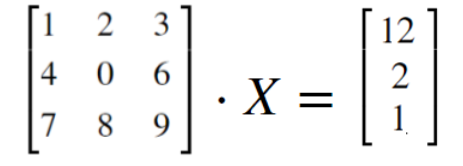

In [2]:
import numpy as np

In [3]:
# РЕШЕНИЕ
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])

print(A)
print("")
print(B)
np.linalg.solve(A, B)

[[1 2 3]
 [4 0 6]
 [7 8 9]]

[12  2  1]


array([-9.2       ,  0.9       ,  6.46666667])

### 2. Найдите псевдорешение:

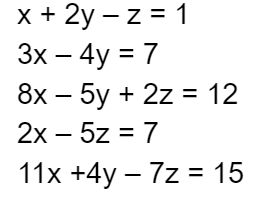

In [5]:
# РЕШЕНИЕ
# Уравнения второе и третье сложим, чтобы прийти к трем переменным, как в остальных уравнениях

A = np.array([[1, 2, -1], [5, -4, -5], [8, -5, 2], [11, 4, -7]])
B = np.array([1, 14, 12, 15])
print(A)
print("")
print(B)

np.linalg.lstsq(A, B)  # Метод поиска псевдорешения СЛАУ

[[ 1  2 -1]
 [ 5 -4 -5]
 [ 8 -5  2]
 [11  4 -7]]

[ 1 14 12 15]


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


(array([ 1.14195466, -0.91785405, -0.89882311]),
 array([0.68582225]),
 3,
 array([15.94588713,  8.69340873,  4.59927474]))

In [6]:
# Сделаем проверку подстановкой
np.dot(A, [1.14195466, -0.91785405, -0.8988231])

array([ 0.20506966, 13.875305  , 11.92726133, 15.18184676])

### 3. Сколько решений имеет линейная система:
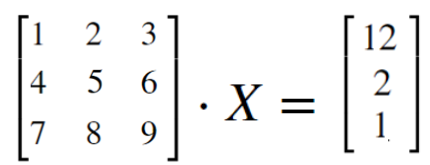

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [7]:
# РЕШЕНИЕ
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A,B.T), axis=1)
print (C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

Ранг расширенной матрицы больше ранга исходной матрицы, следовательно, данная истема не имеет ни одного решения.

In [11]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# Изменим вектор правой части так, чтобы ранг расширенной матрицы стал равным 2
B = np.array([[1, 1, 1]])
C = np.concatenate((A,B.T), axis=1)
print (C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[1 2 3 1]
 [4 5 6 1]
 [7 8 9 1]]


(2, 2)

Ранг 2 меньше числа неизвестных 3, следовательно, система имеет бесконечное число решений.

In [20]:
m = np.array([[1, 2], [4, 5]])
np.linalg.det(m)

-2.9999999999999996

Взятый минор отличен от нуля, поэтому последнее уравнение отбрасываем и третьему неизвестному придаем произвольное значение a.

1x + 2y = 12 - 3a

4x + 5y = 2 - 6a

*

-4x -8y = -48 + 12a

4x + 5y = 2 - 6a

*

-3y = -46 + 6a

4x  = 2 - 6a - 5y

*

y = 46/3 - 2a

x = (2 - 6a - 5*(46/3 - 2a)) / 4

*

y = 46/3 - 2a

x = (2 - 6a - 5*(46/3 - 2a)) / 4

### 4. Вычислите LU-разложение матрицы:
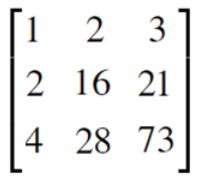

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [21]:
# РЕШЕНИЕ
import scipy 
import scipy.linalg

In [23]:
A = np.array([ [1, 2, 3], [2, 16, 21], [4, 28, 73] ])
P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [30]:
B = np.array([[10, 3, 11]])
C = np.concatenate((A,B.T), axis=1)
print (C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[ 1  2  3 10]
 [ 2 16 21  3]
 [ 4 28 73 11]]


(3, 3)

In [26]:
np.linalg.det(A)

432.00000000000017

Определитель не равен нулю. Ранг расширенной матрицы равен рангу исходной матрицы -> система совместная. Ранг равен числу неизвестных -> система имеет одно решение.

In [31]:
A = np.array([ [1, 2, 3], [2, 16, 21], [4, 28, 73] ])
B = np.array([10, 3, 11])
np.linalg.solve(A, B)

array([12.84259259, -1.39351852, -0.01851852])

### 5. Найдите нормальное псевдорешение недоопределенной системы:
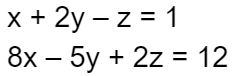

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [32]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
print(A)
print("")
print(B)

np.linalg.lstsq(A, B)  # Метод поиска псевдорешения СЛАУ

[[ 1  2 -1]
 [ 8 -5  2]]

[ 1 12]


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

### 6. Найдите одно из псевдорешений вырожденной системы:
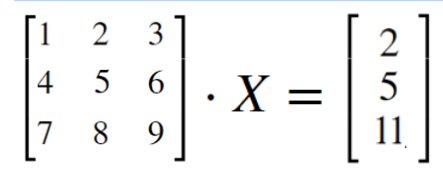

Попробуйте также отыскать и нормальное псевдорешение.

In [2]:
# РЕШЕНИЕ
import numpy as np

# Выполним QR-разложение
A = np.array([ [1, 2, 3], [4, 5, 6], [7, 8, 9] ])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)

print(A)
print(Q)
print(R)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [4]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [5]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

In [6]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

In [7]:
X = np.append(X1, 0)
print(X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [8]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915885

In [33]:
# Найдем нормальное псевдорешение
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])
print(A)
print("")
print(B)

np.linalg.lstsq(A, B)  # Метод поиска псевдорешения СЛАУ

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[ 2  5 11]


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))